## Rodando uma Regressão Linear

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [2]:
# Y = Gastos das famílias
# X = Renda das famílias

dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

dataset = pd.DataFrame(dataset)
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


<AxesSubplot:title={'center':'Box plot'}, xlabel='Reais (R$)'>

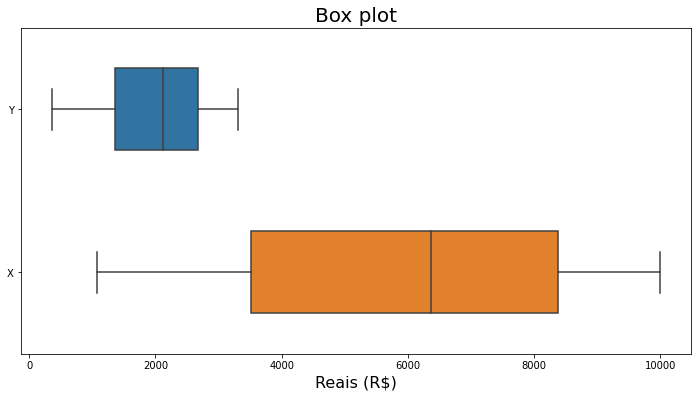

In [3]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

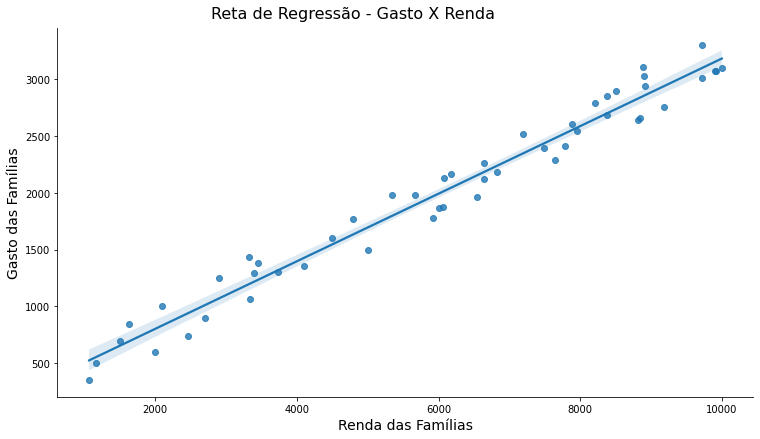

In [4]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [5]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


In [6]:
# Modelo de regressão linear simples

import statsmodels.api as sm

Y = dataset.Y
X = sm.add_constant(dataset.X)

resultado_regressao = sm.OLS(Y, X).fit()

print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.56e-38
Time:                        16:02:22   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [7]:
#Obtendo previsões dentro da amostra
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
...,...,...,...
45,1292,3401,1218.988954
46,2125,6641,2182.210793
47,1431,3329,1197.584024
48,2260,6648,2184.291828


## Correlação

In [8]:
# Covariância
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101)
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


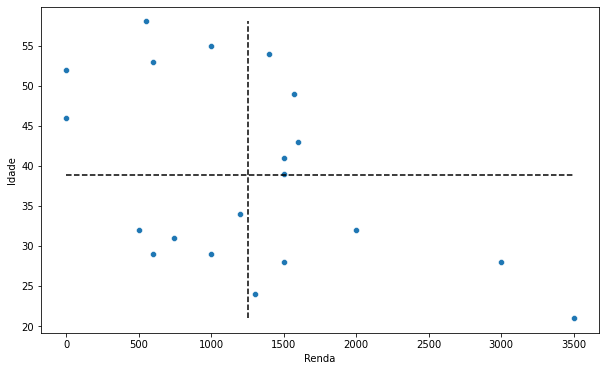

In [9]:
#Verificando a existência de uma associação linear negativa

x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


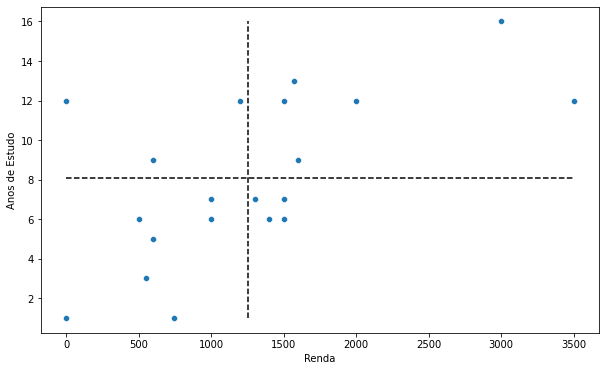

In [10]:
#Verificando a existência de uma associação linear positiva

x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


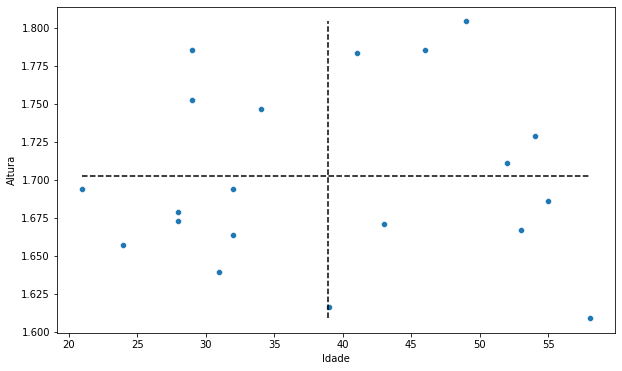

In [11]:
#Verificando a existência de uma associação linear entre as variáveis

x = amostra.Idade
y = amostra.Altura

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

In [12]:
# Coeficiente de correlação de Pearson

#Obtendo s_xy
s_xy = dados[['Altura', 'Renda']].cov()
s_xy= s_xy.Altura.loc['Renda']
print(s_xy)

s_x = dados.Altura.std()
s_y = dados.Renda.std()

#Obtendo coeficiente de correlação
r_xy = s_xy / ( s_x * s_y)
print(r_xy)

-1.0789639314252728
-0.004072608143400292


In [13]:
#Obtendo matriz de correlação com o Pandas
dados[['Altura', 'Renda']].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [14]:
dataset[['Y', 'X']].corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


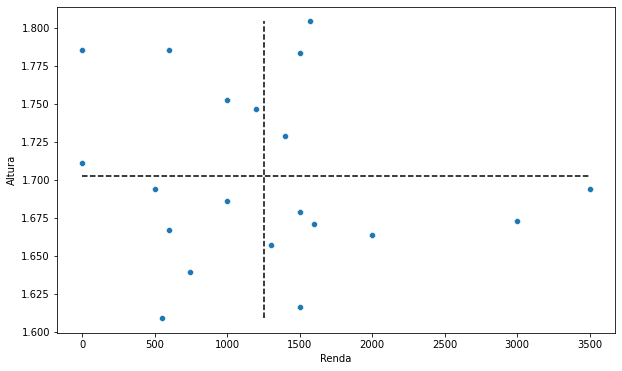

In [15]:
x = amostra.Renda
y = amostra.Altura

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


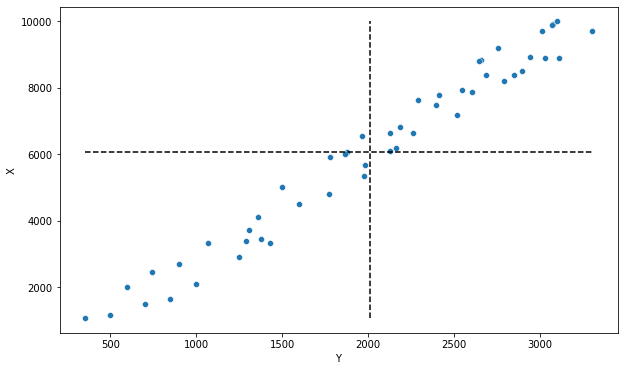

In [16]:
x = dataset.Y
y = dataset.X

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

In [17]:
#Valor do coeficiente de correlação de Pearson para as variáveis X e Y
import numpy as np

sigma_XY = 2178803.59
sigma_X_2 = 7328865.85
sigma_Y_2 = 667839.78

sigma_X = np.sqrt(sigma_X_2)
sigma_Y = np.sqrt(sigma_Y_2)

r_XY = sigma_XY / (sigma_X * sigma_Y)
print('Correlação ->', r_XY.round(4))

Correlação -> 0.9848


## Regressão Linear

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

In [18]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

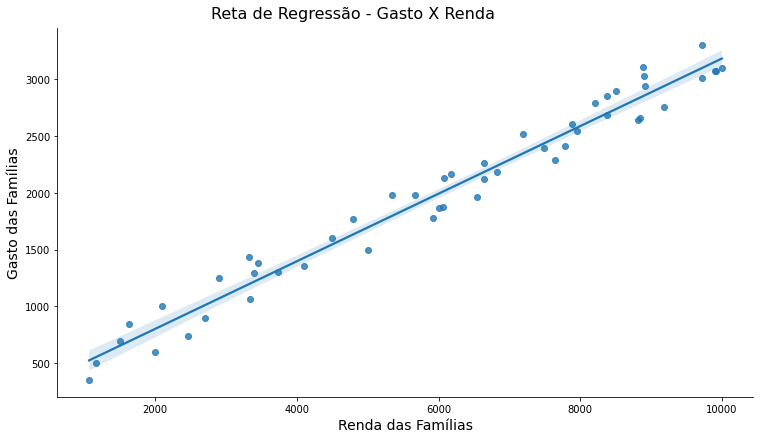

In [19]:
dataset = pd.DataFrame(dataset)

ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [20]:
#Matriz de correlação
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


In [21]:
#Estimadores de mínimos quadrados ordinários

#obter n
n = len(dataset)

#obter soma y
SOMA_Y = dataset.Y.sum()

#obter soma x
SOMA_X = dataset.X.sum()

#obter soma x^2
SOMA_X2 = dataset.X.apply(lambda x: x**2).sum()

#obter soma y^2
SOMA_Y2 = dataset.Y.apply(lambda y: y**2).sum()

#obter soma x*y
SOMA_XY = dataset.apply(lambda data: data.X * data.Y, axis = 1).sum()

In [22]:
#obter beta2
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X)**2
beta_2 = numerador / denominador
beta_2

0.29729069099372424

In [23]:
#obter beta1
beta_1 = dataset.Y.mean() - beta_2 * dataset.X.mean()
beta_1

207.90331377756547

In [24]:
#Obtendo a estimativa dos parâmetros com o StatsModels

import statsmodels.api as sm

Y = dataset.Y
X = sm.add_constant(dataset.X)

In [25]:
#estimando o modelo
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

print(beta_1)
print(beta_2)

207.90331377756547
0.29729069099372424


In [26]:
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

In [27]:
beta_1 = resultado_regressao.params[0]
beta_2 = resultado_regressao.params[1]

print(beta_1)
print(beta_2)

207.90331377756553
0.29729069099372435


In [28]:
#Intervalo de confiança para os parêmetros estimados
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


In [29]:
#previsões dentro da amostra
dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X
dataset.head(10)

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


In [30]:
#utilizando o statsmodels
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto,Y_previsto_statsmodels
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723


In [31]:
dataset.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True)
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
...,...,...,...
45,1292,3401,1218.988954
46,2125,6641,2182.210793
47,1431,3329,1197.584024
48,2260,6648,2184.291828


In [32]:
#estimando fora da amostra
def prever(x):
  return beta_1 + beta_2 * x


prever(7510)

2440.556403140435

In [33]:
#estimando fora da amostra via statsmodels
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [34]:
dataset['u'] = dataset.Y - dataset.Y_previsto
dataset.head()

,Y,X,Y_previsto,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [35]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,Y,X,Y_previsto,u,Residuos
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [36]:
dataset.drop(['u'], axis = 1, inplace = True)
dataset.head()

,Y,X,Y_previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [37]:
dataset.Residuos.mean()

-5.525180313270539e-13

<AxesSubplot:title={'center':'Resíduos vs Variável Independente'}, xlabel='X', ylabel='Resíduos'>

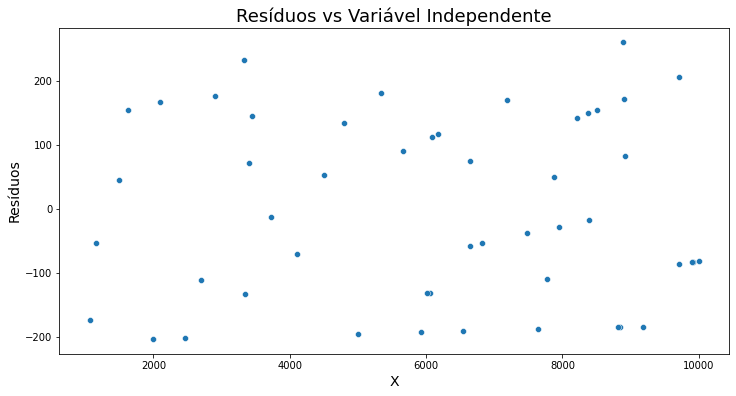

In [38]:
#Plotando os resíduos do modelo

ax = sns.scatterplot(x=dataset.X, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

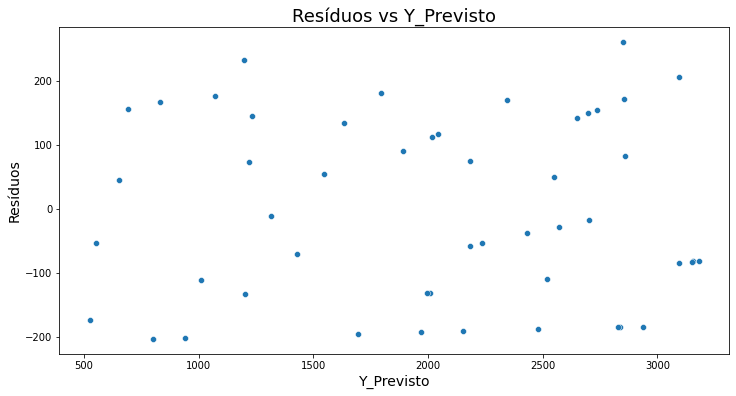

In [39]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos² vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos²'>

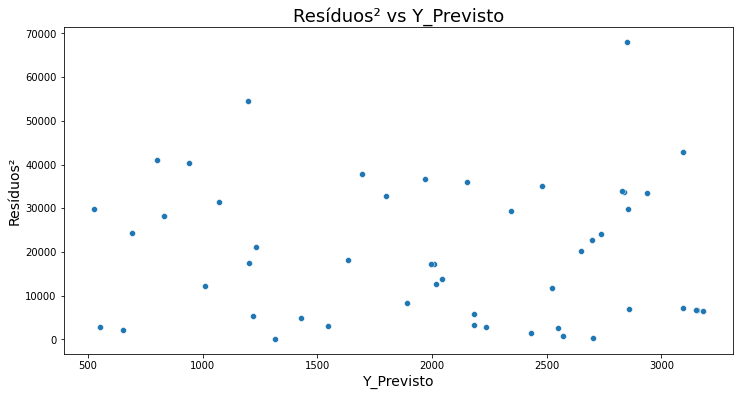

In [40]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

In [41]:
dataset.head()

,Y,X,Y_previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [42]:
# Soma dos quadrados dos erros SQE
SQE = dataset.Residuos.apply(lambda u: u**2).sum()
SQE

984986.0375191914

In [43]:
# Utilizando o ssr (sum of squared residuals) do statsmodels
resultado_regressao.ssr

984986.0375191915

In [44]:
# Soma dos quadrados toral SQT
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQT

32724149.279999997

In [45]:
# Soma dos quadrados da regressão SQR
SQR = dataset.Y_previsto.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQR

31739163.24248083

In [46]:
# Utilizando o ess (explained sum of squares) do statsmodels
resultado_regressao.ess

31739163.242480807

Coeficiente de determinação (R²)

In [47]:
R2 = SQR / SQT
R2

0.9699003317369304

In [48]:
resultado_regressao.rsquared

0.9699003317369297

In [49]:
#Testes aplicados a modelos de regressão
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.56e-38
Time:                        16:02:25   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

In [50]:
EQM = SQE / (n - 2)
EQM

20520.542448316486

In [51]:
EQM = resultado_regressao.mse_resid
EQM

20520.54244831649

In [52]:
# Teste de hipótese para nulidade do coeficiente angular

#Calculando s
s = np.sqrt(resultado_regressao.mse_resid)

#Calculando soma (Xi - X)^2
SOMA_DESVIO2 = dataset.X.apply(lambda x: (x - dataset.X.mean())**2).sum()

#Calculando S beta 2
s_beta_2 = s / np.sqrt(SOMA_DESVIO2)

In [53]:
#Determinando as áreas de aceitação e rejeição de H0
from scipy.stats import t as t_student

confianca = 0.95
significancia = 1 - confianca

graus_de_liberdade = resultado_regressao.df_resid
graus_de_liberdade

48.0

In [54]:
#Obtendo T alpha/2
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [55]:
#determina limite da area de rejeição no teste bicaudal
t_alpha_2 = t_student.ppf(probabilidade, graus_de_liberdade)
t_alpha_2

2.0106347546964454

In [56]:
#Obtendo t = beta2/s beta2
#valor dentro da área de rejeição da hipótese nula por ser maior que t
t = (beta_2 - 0) / s_beta_2
t

39.328131926755034

In [57]:
#simplificado
resultado_regressao.tvalues[1]

39.32813192675501

In [58]:
#critério do valor crítico
#rejeitar hipótese se t <= -t aplha/2 ou se t >= t alpha/2

t <= -t_alpha_2, t >= -t_alpha_2

(False, True)

In [59]:
#critério do p - valor
#rejeitar se o valor de p <= alpha

p_valor = 2 * (t_student.sf(t, graus_de_liberdade))
p_valor

3.5555432285858875e-38

In [60]:
#simplificado
p_valor = resultado_regressao.pvalues[1]
p_valor

3.5555432285859883e-38

In [61]:
p_valor <= significancia

True

<font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

In [62]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.56e-38
Time:                        16:02:25   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

In [63]:
#Calculando a estatística de teste (F)
resultado_regressao.mse_model
resultado_regressao.mse_resid

F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F

1546.7019608482472

In [64]:
#simplificado
resultado_regressao.fvalue

1546.7019608482472

In [65]:
#Obtendo o p-valor simplificado
resultado_regressao.f_pvalue

3.5555432285860227e-38

In [66]:
from scipy.stats import f
p_valor = f.sf(F, 1, 48)
p_valor

3.5555432285860227e-38

In [67]:
p_valor <= 0.05

True

## Extras

In [68]:
#Normalidade dos resíduos - Omnibus

#se p-valor < 0,05 (nível de significancia) 
# rejeita a hipótese nula de que os testes se distribuem como anormais

from scipy.stats import normaltest

normaltest(dataset.Residuos)

NormaltestResult(statistic=22.8329680279357, pvalue=1.1012451024593462e-05)

In [69]:
statistic, p_valor = normaltest(dataset.Residuos)
p_valor <= 0.05

True

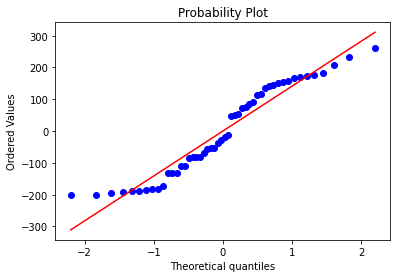

In [70]:
#comparação da distribuição dos dados

from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_, _, _)) = probplot(dataset.Residuos, plot = plt)

<AxesSubplot:>

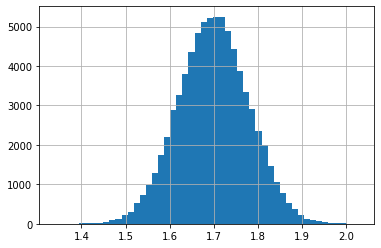

In [71]:
dados.Altura.hist(bins=50)

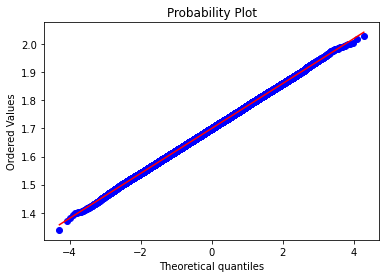

In [72]:
#o mais proximo possível de uma distribuição normal
(_, (_, _, _)) = probplot(dados.Altura, plot = plt)

In [73]:
#Verificando a simetria
from scipy.stats import skew

S = skew(dataset.Residuos)
S

0.07306920116444166

In [74]:
#Verificando a curtose
from scipy.stats import kurtosis

C = 3 + kurtosis(dataset.Residuos)
C

1.6369621580686435

In [75]:
#Normalidade dos resíduos - Jarque-Bera (statsmodels)
JB = (n / 6.) * (S ** 2 + (1 / 4.) * (C - 3) ** 2)
JB

3.915059564941934

In [76]:
from scipy.stats import chi2

p_valor = chi2.sf(JB, 2)
p_valor

0.14120680197285554

In [77]:
p_valor <= 0.05

False

In [78]:
#Normalidade dos resíduos - Jarque-Bera (Correção)
JB = (n - 1 / 6.) * (S ** 2 + (1 / 4.) * (C - 3) ** 2)
JB

23.412056198352765

In [79]:
from scipy.stats import chi2

p_valor = chi2.sf(JB, 2)
p_valor

8.243973584285111e-06

In [80]:
p_valor <= 0.05

True